In [38]:
import requests
import json
import pandas as pd
from datetime import datetime

#8.682278, -82.263072
url = "https://www.imhpa.gob.pa/es/niveles-data?estacion=1080105"

try:
    response = requests.get(url)
    response.raise_for_status()  
    data = response.json()["data"]

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
except Exception as e:
    print(f"A random error occurred: {e}")

data

[[1731024000000, 1.14],
 [1731024900000, 1.13],
 [1731025800000, 1.12],
 [1731026700000, 1.1],
 [1731027600000, 1.09],
 [1731028500000, 1.09],
 [1731029400000, 1.08],
 [1731030300000, 1.07],
 [1731031200000, 1.07],
 [1731032100000, 1.05],
 [1731033000000, 1.05],
 [1731033900000, 1.04],
 [1731034800000, 1.04],
 [1731035700000, 1.03],
 [1731036600000, 1.03],
 [1731037500000, 1.03],
 [1731038400000, 1.02],
 [1731039300000, 1.02],
 [1731040200000, 1.01],
 [1731041100000, 1.01],
 [1731042000000, 1.01],
 [1731042900000, 1],
 [1731043800000, 1],
 [1731044700000, 0.99],
 [1731045600000, 1],
 [1731046500000, 0.99],
 [1731047400000, 0.99],
 [1731048300000, 0.98],
 [1731049200000, 0.98],
 [1731050100000, 0.98],
 [1731051000000, 0.98],
 [1731051900000, 0.97],
 [1731052800000, 0.97],
 [1731053700000, 0.97],
 [1731054600000, 0.97],
 [1731055500000, 0.97],
 [1731056400000, 0.96],
 [1731057300000, 0.96],
 [1731058200000, 0.95],
 [1731059100000, 0.96],
 [1731060000000, 0.96],
 [1731060900000, 0.95],
 [

In [39]:
registros_estructurados = []
for registro in data :
    registros_estructurados.append({
        "timestamp": registro[0],
        "dia": datetime.fromtimestamp(registro[0]/1000),
        "nivel": registro[1]
    })

df = pd.DataFrame(registros_estructurados)
df = df[df["nivel"] > -10]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2860 entries, 0 to 2962
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  2860 non-null   int64         
 1   dia        2860 non-null   datetime64[ns]
 2   nivel      2860 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 89.4 KB


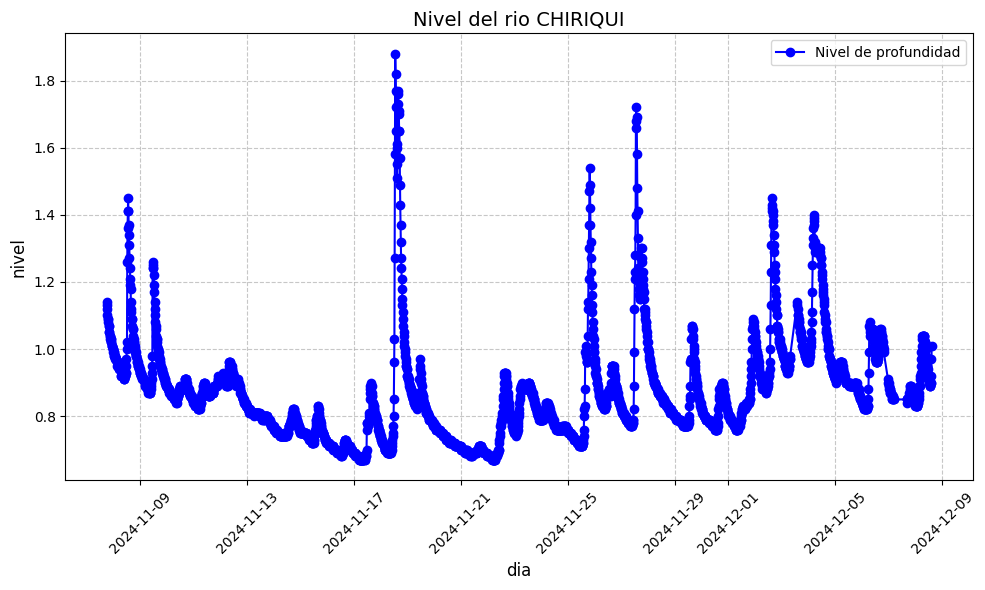

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['dia'], df['nivel'], marker='o', linestyle='-', color='blue', label='Nivel de profundidad')
plt.title('Nivel del rio CHIRIQUI', fontsize=14)
plt.xlabel('dia', fontsize=12)
plt.ylabel('nivel', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()